In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

ModuleNotFoundError: No module named 'plotly'

In [3]:
df=pd.read_csv('/Users/vishal/Documents/code/supply-chain-orchestration/src/scm-dataset/SupplyChainDataset.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 1709: invalid continuation byte

In [4]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

deleting duplicate and not reated features

In [5]:
data=df.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

Type  Benefit per order  Sales per customer   Delivery Status  Late_delivery_risk   Category Name Customer City Customer Country  Customer Id Customer Segment Customer State  Customer Zipcode Department Name   Latitude   Longitude        Market  Order City Order Country  Order Customer Id order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Product Price  Order Item Profit Ratio  Order Item Quantity   Sales  Order Item Total  Order Profit Per Order    Order Region      Order State     Order Status  Order Zipcode  Product Card Id  Product Category Id  Product Description                                 Product Image  Product Name  Product Price  Product Status shipping date (DateOrders)   Shipping Mode
0     DEBIT          91.250000          314.640015  Advance shipping                   0  Sporting Goods        Caguas      Puerto Rico        20755         Consumer             PR             725.0         Fitness  18.251453  -66.037056  Pacific Asia      Bekasi     Indonesia              20755         1/31/2018 22:56     77202                    1360            13.110000                      0.04         180517                    327.75                     0.29                    1  327.75        314.640015               91.250000  Southeast Asia  Java Occidental         COMPLETE            NaN             1360                   73                  NaN  http://images.acmesports.sports/Smart+watch   Smart watch          327.75               0             2/3/2018 22:56  Standard Class
1  TRANSFER        -249.089996          311.359985     Late delivery                   1  Sporting Goods        Caguas      Puerto Rico        19492         Consumer             PR             725.0         Fitness  18.279451  -66.037064  Pacific Asia     Bikaner         India              19492         1/13/2018 12:27     75939                    1360            16.389999                      0.05         179254                    327.75                    -0.80                    1  327.75        311.359985             -249.089996      South Asia         Rajast�n          PENDING            NaN             1360                   73                  NaN  http://images.acmesports.sports/Smart+watch   Smart watch          327.75               0            1/18/2018 12:27  Standard Class
2      CASH        -247.779999          309.720001  Shipping on time                   0  Sporting Goods      San Jose          EE. UU.        19491         Consumer             CA           95125.0         Fitness  37.292233 -121.881279  Pacific Asia     Bikaner         India              19491         1/13/2018 12:06     75938                    1360            18.030001                      0.06         179253                    327.75                    -0.80                    1  327.75        309.720001             -247.779999      South Asia         Rajast�n           CLOSED            NaN             1360                   73                  NaN  http://images.acmesports.sports/Smart+watch   Smart watch          327.75               0            1/17/2018 12:06  Standard Class
3     DEBIT          22.860001          304.809998  Advance shipping                   0  Sporting Goods   Los Angeles          EE. UU.        19490      Home Office             CA           90027.0         Fitness  34.125946 -118.291016  Pacific Asia  Townsville     Australia              19490         1/13/2018 11:45     75937                    1360            22.940001                      0.07         179252                    327.75                     0.08                    1  327.75        304.809998               22.860001         Oceania       Queensland         COMPLETE            NaN             1360                   73                  NaN  http://images.acmesports.sports/Smart+watch   Smart watch          327.75               0            1/16/2018 11:45  Standard Class
4   PAYMENT         13

# Data Visualization

# delvery status

In [6]:
data_delivery_status=df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [7]:
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )

Central America and Western Europa have the most lated delivered Orders

# Top 20 Customers regarding the quanitity of orders

In [8]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders'      )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Top 20 Customers regarding profit of all orders

In [9]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers_profit=df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)
px.bar(data_customers_profit.head(20),x='Profit of Orders', y='Customer_ID_STR' , color='Profit of Orders'      )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Customer Segment

In [10]:
#Customer Segments
data_Customer_Segment=df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

# Category

In [11]:
#Category Name
data_Category_Name=df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')



# Geo Features

In [12]:
data_Region=df1.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region, x='Number of Orders',y = 'Order Region',color ='Number of Orders')



In [13]:
data_countries=df1.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_countries.head(20), x='Number of Orders',y = 'Order Country',color ='Number of Orders')


In [14]:

df_geo=df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo

Order Country     Order City  Profit of Orders
3260  Rep�blica Dominicana  Santo Domingo      51111.670019
1492        Estados Unidos  New York City      47889.759868
2152              Honduras    Tegucigalpa      40973.640056
1430        Estados Unidos    Los Angeles      38014.360024
2837             Nicaragua        Managua      34319.950107
...                    ...            ...               ...
738                  China         Dalian      -1588.609972
3               Afganist�n       Kandahar      -1681.830001
3110           Reino Unido         Dudley      -1742.079996
2463                Italia      Cerignola      -2212.530012
125               Alemania        Pulheim      -3152.150012

[3665 rows x 3 columns]

In [15]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

# Sales Analysis

In [16]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [17]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')


In [18]:
#Product
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')


In [19]:
#Product and deliveray status
df_sales_pd=df1.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')


In [20]:
#Product and order region
df_sales_pr=df1.groupby([ 'Product Name', 'Order Region'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Product Name',color ='Order Region')


In [21]:
#'Category Name'
df_sales_pr=df1.groupby([  'Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Category Name',color ='Sales of Orders')


In [22]:
#'Type of payment
df_sales_pr=df1.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')


In [23]:
df_sales_tp=df1.groupby([ 'Type', 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_tp.head(10), x='Sales of Orders',y = 'Type',color ='Product Name')


# Date and sales analysis

In [24]:
import datetime as dt

data_orderdate=df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [26]:
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x='Sales of Orders',y = 'YearStr',color ='Sales of Orders')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
data_orderdate['QuarterStr']=data_orderdate['Quarter'].astype(str)
df_sales_quarter=data_orderdate.groupby([ 'YearStr','QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_quarter, x='Sales of Orders',y = 'QuarterStr',color ='YearStr')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
data_orderdate['MonthStr']=data_orderdate['Month'].astype(str)
df_sales_m=data_orderdate.groupby([ 'QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_m, x='Sales of Orders',y = 'QuarterStr',color ='MonthStr')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Forecasting

Predicting if an order is fraud or not

In [29]:
data=df1.copy()
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x


In [31]:
features=data.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=data['SUSPECTED_FRAUD']

In [32]:
features.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

we can consider NaN values as a separte class using LabelEncoder

In [33]:
features=features.apply(Labelencoder_feature)
features.head()

Type  Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  Category Name  Customer City  Customer Country  Customer Id  Customer Segment  Customer State  Customer Zipcode  Department Name  Latitude  Longitude  Market  Order City  Order Country  Order Customer Id  order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  Sales  Order Item Total  Order Profit Per Order  Order Region  Order State  Order Zipcode  Product Card Id  Product Category Id  Product Description  Product Image  Product Name  Product Price  Product Status  shipping date (DateOrders)  Shipping Mode  Customer_ID_STR
0     1              18934                2568                0                   0             40             66                 1        20649                 0              36                 7                4      3624       4420       3         331             70              20649                     5961     65749                     114                  426                         4         180516                        62                      140                    0    166              2568                   18934            15          475          12733              114                   47                    0             78            78             62               0                       27149              3            11912
1     3               2272                2559                1                   1             40             66                 1        19386                 0              36                 7                4      5522       4419       3         391             69              19386                     1147     64486                     114                  498                         5         179253                        62                       44                    0    166              2559                    2272            13          841         100315              114                   47               120339             78            78             62               0                        2209              3            10509
2     0               2293                2555                3                   0             40            452                 0        19385                 0               5               941                4      9146        232       3         391             69              19385                     1146     64485                     114                  529                         6         179252                        62                       44                    0    166              2555                    2293            13          841         100316              114                   47               120340             78            78             62               0                        1980              3            10508
3     1              13638                2546                0                   0             40            285                 0        19384                 2               5               720                4      8467        663       3        3226              8              19384                     1145     64484                     114                  600                         7         179251                        62                      119                    0    166              2546                   13638            11          835         100317              114                   47               120341             78            78             62               0                        1752              3            10507
4     2              20599                2526                0                   0             40             66                 1        19383                 1              36                 7                4      3783       4421       3 

In [34]:
#deleting features which high-correlated with other features to avoid multicollinarity
data1=pd.concat([features,target],axis=1)


In [35]:
#deleting features which high-correlated with other features to avoid multicollinarity

corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 'Product Status', 'Shipping Mode', 'Customer_ID_STR', 'SUSPECTED_FRAUD'], dtype='object')

In [36]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer_ID_STR']]

In [37]:
from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])
    
    
corre

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.



Type  Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  Category Name  Customer City  Customer Country  Customer Id  Customer Segment  Customer State  Customer Zipcode  Department Name  Latitude  Longitude    Market  Order City  Order Country  order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Product Price  Order Item Quantity  Order Region  Order State  Order Zipcode  Product Description  Product Image  Product Status  Shipping Mode  Customer_ID_STR
0  0.202094          -0.002586           -0.000807         0.128768           -0.167158      -0.002104      -0.003561          0.006756     0.009375         -0.005935        0.005670         -0.005600        -0.000837 -0.004709   0.005100 -0.000293   -0.005889      -0.004928                 0.003002  0.002222               -0.001109             0.002893                  0.002271                  0.000315            -0.000757      0.009077    -0.006105  -4.274182e-02        -5.615812e-02      -0.000741             NaN      -0.004641         0.000490
1  0.000000           0.271923            0.731807         0.000000            0.000000       0.371352       0.130283          0.004098     0.000068          0.011686        0.016001          0.017337         0.722187  0.045427   0.030231  0.900798    0.012345       0.036290                 0.202217  0.345187                0.637360             0.219059                  0.334515                  0.893383             0.747677      0.000115     0.009491   9.230621e-74        5.077551e-126       0.752963             NaN       0.048639         0.835012

In [38]:
corre1=corre.T

In [39]:
coore2= corre1.iloc[:,0].sort_values(ascending=False)

coore2

Type                        0.202094
Delivery Status             0.128768
Customer Id                 0.009375
Order Region                0.009077
Customer Country            0.006756
Customer State              0.005670
Longitude                   0.005100
order date (DateOrders)     0.003002
Order Item Discount         0.002893
Order Item Discount Rate    0.002271
Order Id                    0.002222
Customer_ID_STR             0.000490
Order Item Product Price    0.000315
Market                     -0.000293
Product Image              -0.000741
Order Item Quantity        -0.000757
Sales per customer         -0.000807
Department Name            -0.000837
Order Item Cardprod Id     -0.001109
Category Name              -0.002104
Benefit per order          -0.002586
Customer City              -0.003561
Shipping Mode              -0.004641
Latitude                   -0.004709
Order Country              -0.004928
Customer Zipcode           -0.005600
Order City                 -0.005889
C

In [40]:
coore2.index

Index(['Type', 'Delivery Status', 'Customer Id', 'Order Region', 'Customer Country', 'Customer State', 'Longitude', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Id', 'Customer_ID_STR', 'Order Item Product Price', 'Market', 'Product Image', 'Order Item Quantity', 'Sales per customer', 'Department Name', 'Order Item Cardprod Id', 'Category Name', 'Benefit per order', 'Customer City', 'Shipping Mode', 'Latitude', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State', 'Order Zipcode', 'Product Description', 'Late_delivery_risk', 'Product Status'], dtype='object')

omit all features which have less than +-0.004 correlation with target

In [41]:
new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

In [42]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning:

invalid value encountered in true_divide



In [43]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [44]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

Variable      F_Value  P_Value
0                         Type  7686.615869    0.000
18           Order Customer Id    15.868141    0.000
3              Delivery Status  3043.655705    0.000
4           Late_delivery_risk  5188.953532    0.000
33               Order Zipcode   330.383488    0.000
8                  Customer Id    15.868141    0.000
31                Order Region    14.875551    0.000
36         Product Description   571.103804    0.000
7             Customer Country     8.239934    0.004
32                 Order State     6.728235    0.009
16                  Order City     6.260807    0.012
9             Customer Segment     6.358072    0.012
10              Customer State     5.802926    0.016
11            Customer Zipcode     5.662017    0.017
14                   Longitude     4.696175    0.030
17               Order Country     4.383497    0.036
13                    Latitude     4.002769    0.045
42               Shipping Mode     3.887812    0.049
41  shipping date (DateOrders)     3.875811    0.049

In [45]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Order Customer Id', 'Delivery Status',
       'Late_delivery_risk', 'Order Zipcode', 'Customer Id',
       'Order Region', 'Product Description', 'Customer Country',
       'Order State', 'Order City', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Longitude', 'Order Country', 'Latitude',
       'Shipping Mode', 'shipping date (DateOrders)'], dtype=object)

In [46]:
#final features list is both f_ref_list and new_feature
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]

In [47]:
final_data=pd.concat([final_features, target], axis=1)

<AxesSubplot:>

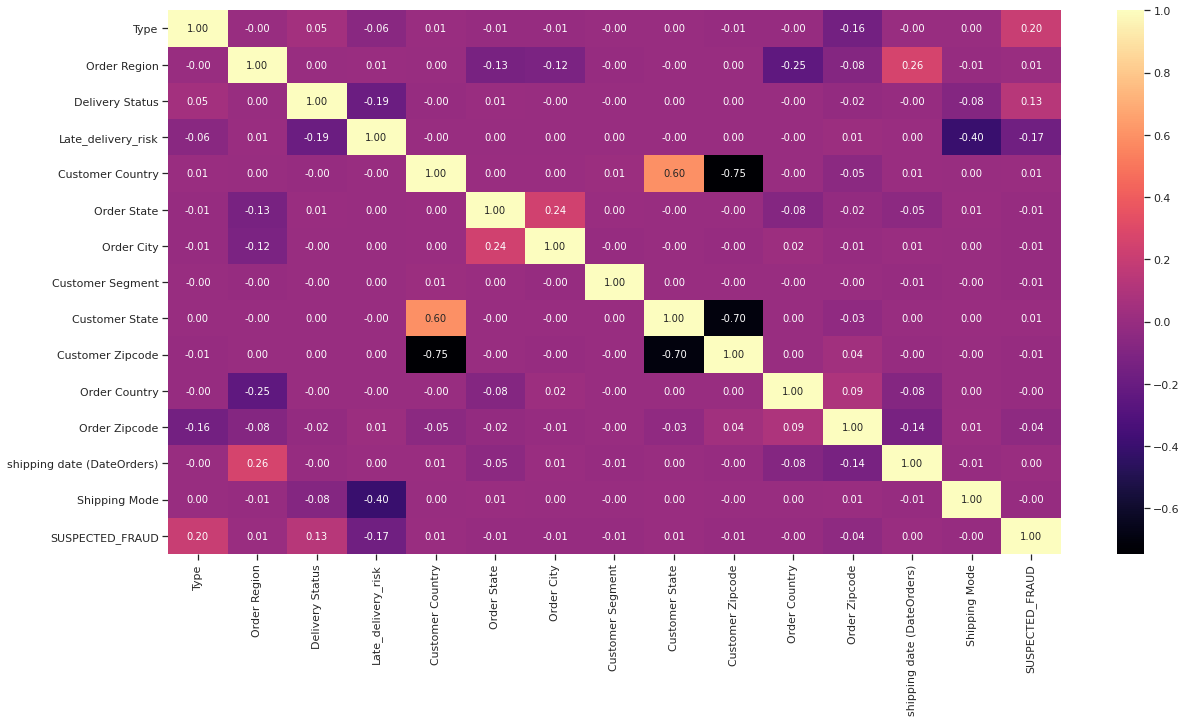

In [48]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

customer ZipCode and Customer state have high correlation with Customer Country. we can omit them and keep only customer country

In [49]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

I use several classifiaction models using also CV to find the best model with best hyper parameter. 
pre-proccessing method is standard scaler


In [52]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])


In [53]:
pip_dict1 ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }

In [54]:
piplines1=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [55]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features2, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.9751217455582278
RandomForestClassifier :  0.9743850467720389
KNeighborsClassifier :  0.9748503332686301
GaussianNB :  0.9795478562150082
SGDClassifier :  0.9774982135396149
DecisionTreeClassifier :  0.972224585735939


In [56]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    
    
    
]

In [57]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)


In [58]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.7min finished


In [59]:
best_model.best_params_

{'classifier__n_estimators': 300,
 'classifier__max_features': 'log2',
 'classifier__criterion': 'gini',
 'classifier': RandomForestClassifier(max_features='log2', n_estimators=300)}

In [60]:
pipeline_rf = Pipeline([('scaler', StandardScaler()), 
                           ('Random Forest Calssifer', RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        n_estimators=150))])

In [61]:
model = pipeline_rf.fit(X_train, y_train)

In [62]:
rf_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
rf_train_predict.head()

actual  predicted
116587       0          0
36340        0          0
175763       0          0
96918        0          0
71197        0          0

In [63]:
rf_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
rf_test_predict.head()

actual  predicted
80120        0          0
19670        0          0
114887       0          0
120110       0          0
56658        0          0

In [64]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  1.0
Accuracy Score for test dataset :  0.9962054066031465


In [65]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  1.0
ROC-AUC Score for validation dataset :  0.9515587050614198


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error



<AxesSubplot:>

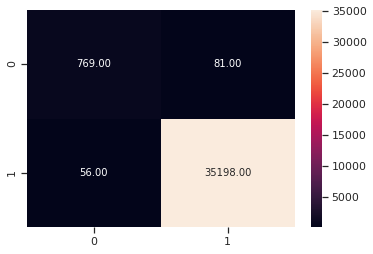

In [66]:
conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted, [1,0])
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [67]:
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.93      0.90      0.92       850

    accuracy                           1.00     36104
   macro avg       0.96      0.95      0.96     36104
weighted avg       1.00      1.00      1.00     36104



Forecasting of an order has tardiness

In [68]:
data=df[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 
             'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode', 
             'Department Name', 'Market', 'Order City', 'Order Country', 'Customer Id',
             'order date (DateOrders)', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate',
             'Order Item Id', 'Order Item Profit Ratio', 'Sales', 'Order Status',
             'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Zipcode', 
             'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
             'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]



In [69]:
features=data.drop(columns=['Late_delivery_risk'])
target=data['Late_delivery_risk']

In [70]:
features=features.apply(Labelencoder_feature)
features.head()


Type  Benefit per order  Sales per customer  Delivery Status  Category Name  Customer City  Customer Country  Customer Segment  Customer State  Customer Zipcode  Department Name  Market  Order City  Order Country  Customer Id  order date (DateOrders)  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Profit Ratio  Sales  Order Status  Order Item Total  Order Profit Per Order  Order Region  Order State  Order Zipcode  Product Card Id  Product Category Id  Product Description  Product Image  Product Name  Product Price  Product Status  shipping date (DateOrders)  Shipping Mode
0     1              18934                2568                0             40             66                 1                 0              36                 7                4       3         331             70        20649                     5961                     114                  426                         4         180516                      140    166             2              2568                   18934            15          475          12733              114                   47                    0             78            78             62               0                       27149              3
1     3               2272                2559                1             40             66                 1                 0              36                 7                4       3         391             69        19386                     1147                     114                  498                         5         179253                       44    166             5              2559                    2272            13          841         100315              114                   47               120339             78            78             62               0                        2209              3
2     0               2293                2555                3             40            452                 0                 0               5               941                4       3         391             69        19385                     1146                     114                  529                         6         179252                       44    166             1              2555                    2293            13          841         100316              114                   47               120340             78            78             62               0                        1980              3
3     1              13638                2546                0             40            285                 0                 2               5               720                4       3        3226              8        19384                     1145                     114                  600                         7         179251                      119    166             2              2546                   13638            11          835         100317              114                   47               120341             78            78             62               0                        1752              3
4     2              20599                2526                0             40             66                 1                 1              36                 7                4       3        3226              8        19383                     1144                     114                  682                         8         179250                      156    166             6              2526                   20599            11          835         100318              114                   47               120342             78            78             62               0                        1528              3

In [71]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning:

invalid value encountered in true_divide



In [72]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [73]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

Variable       F_Value  P_Value
0                         Type    685.999651    0.000
30         Product Description     72.142896    0.000
27               Order Zipcode     25.191994    0.000
36               Shipping Mode  34666.398337    0.000
3              Delivery Status   6798.252477    0.000
25                Order Region      6.848744    0.009
5                Customer City      4.662629    0.031
35  shipping date (DateOrders)      3.556568    0.059

In [74]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Product Description', 'Order Zipcode', 'Shipping Mode',
       'Delivery Status', 'Order Region', 'Customer City',
       'shipping date (DateOrders)'], dtype=object)

In [75]:
df['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

'Delivery Status' should also be omited. it has directly related to the target

In [76]:
final_features=features[['Type', 'Shipping Mode', 'Order Region',
       'Customer City', 'shipping date (DateOrders)']]

In [77]:
final_data=pd.concat([final_features, target], axis=1)

<AxesSubplot:>

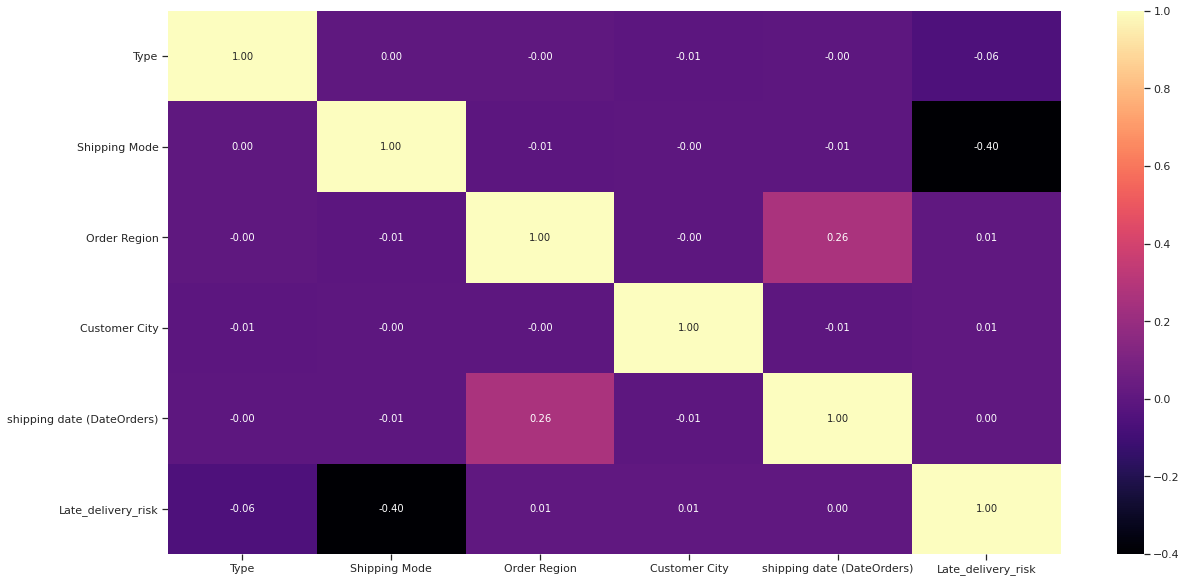

In [78]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state = 42)

In [80]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(piplines1):
    score = cross_val_score(pipe, final_features, target, cv = 10)
    print(pip_dict1[i], ": ", score.mean())

Logistic Regression :  0.6906918386309326
RandomForestClassifier :  0.8926758576651675
KNeighborsClassifier :  0.7423094244520747
GaussianNB :  0.6718960851534189
SGDClassifier :  0.6906918386309326
DecisionTreeClassifier :  0.8855353163083501


In [81]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    {"classifier": [KNeighborsClassifier()],
     "classifier__n_neighbors": [2,3,4,5,6],
     "classifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
     "classifier__leaf_size": [10,20,30,40,50],
    
    },
    
    {"classifier": [DecisionTreeClassifier()],
    "classifier__splitter" :["best", "random"],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
]

In [82]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)


In [83]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.2min finished


In [84]:
best_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_features': 'log2',
 'classifier__criterion': 'entropy',
 'classifier': RandomForestClassifier(criterion='entropy', max_features='log2')}

In [85]:
pipeline_rfl = Pipeline([('scaler', StandardScaler()), 
                           ('andomForestClassifier', RandomForestClassifier(criterion='entropy'))])

In [86]:
model_rfl = pipeline_rfl.fit(X_train, y_train)

In [87]:
rfl_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model_rfl.predict(X_train)})
rfl_train_predict.head()

actual  predicted
116587       1          1
36340        0          0
175763       1          1
96918        1          1
71197        1          1

In [88]:
rfl_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

actual  predicted
80120        1          1
19670        1          1
114887       0          1
120110       1          1
56658        0          0

In [89]:
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))

Accuracy Score for train dataset :  0.9999861510230932
Accuracy Score for test dataset :  0.9475958342565921


In [90]:
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rfl_test_predict.actual, rfl_test_predict.predicted))

ROC-AUC Score for train dataset :  0.9999873705481181
ROC-AUC Score for validation dataset :  0.9472528918259713


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error



<AxesSubplot:>

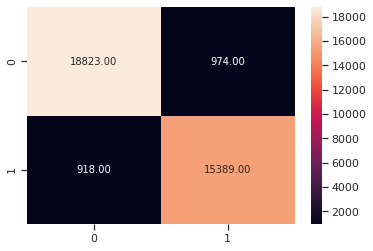

In [91]:
conn_cm_test = metrics.confusion_matrix(rfl_test_predict.actual, rfl_test_predict.predicted, [1,0])
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [92]:
print(metrics.classification_report(rfl_test_predict.actual, rfl_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16307
           1       0.95      0.95      0.95     19797

    accuracy                           0.95     36104
   macro avg       0.95      0.95      0.95     36104
weighted avg       0.95      0.95      0.95     36104



# Forecasting Sales of different products

In [93]:
data_sales=df[['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']]

In [94]:
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales']

In [95]:
features=features.apply(Labelencoder_feature)
features.head()

Type  Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  Category Name  Customer City  Customer Country  Customer Id  Customer Segment  Customer State  Customer Zipcode  Department Name  Latitude  Longitude  Market  Order City  Order Country  Order Customer Id  order date (DateOrders)  Order Id  Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  Order Item Id  Order Item Profit Ratio  Order Item Total  Order Profit Per Order  Order Region  Order State  Order Status  Order Zipcode  Product Card Id  Product Category Id  Product Description  Product Image  Product Name  Product Price  Product Status  shipping date (DateOrders)  Shipping Mode
0     1              18934                2568                0                   0             40             66                 1        20649                 0              36                 7                4      3624       4420       3         331             70              20649                     5961     65749                     114                  426                         4         180516                      140              2568                   18934            15          475             2          12733              114                   47                    0             78            78             62               0                       27149              3
1     3               2272                2559                1                   1             40             66                 1        19386                 0              36                 7                4      5522       4419       3         391             69              19386                     1147     64486                     114                  498                         5         179253                       44              2559                    2272            13          841             5         100315              114                   47               120339             78            78             62               0                        2209              3
2     0               2293                2555                3                   0             40            452                 0        19385                 0               5               941                4      9146        232       3         391             69              19385                     1146     64485                     114                  529                         6         179252                       44              2555                    2293            13          841             1         100316              114                   47               120340             78            78             62               0                        1980              3
3     1              13638                2546                0                   0             40            285                 0        19384                 2               5               720                4      8467        663       3        3226              8              19384                     1145     64484                     114                  600                         7         179251                      119              2546                   13638            11          835             2         100317              114                   47               120341             78            78             62               0                        1752              3
4     2              20599                2526                0                   0             40             66                 1        19383                 1              36                 7                4      3783       4421       3        3226              8              19383                     1144     64483                     114                  682                         8         179250                      156              2526                   20599            11          835             6         10

In [96]:
#Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning:

invalid value encountered in true_divide



In [97]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [98]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

Variable        F_Value  P_Value
20                    Order Id    1165.171704    0.000
22         Order Item Discount   57166.125441    0.000
21      Order Item Cardprod Id   12782.968321    0.000
39  shipping date (DateOrders)     142.652140    0.000
19     order date (DateOrders)     128.461963    0.000
18           Order Customer Id     673.464036    0.000
27      Order Profit Per Order   13782.670150    0.000
15                      Market     240.910781    0.000
28                Order Region     140.517795    0.000
29                 Order State      27.935380    0.000
26            Order Item Total  481682.347274    0.000
12             Department Name     524.094617    0.000
32             Product Card Id   12782.968321    0.000
8                  Customer Id     673.464036    0.000
33         Product Category Id   10095.780861    0.000
35               Product Image   37751.723070    0.000
5                Category Name   26066.331991    0.000
36                Product Name   37751.723070    0.000
37               Product Price  116680.120560    0.000
2           Sales per customer  481682.347274    0.000
1            Benefit per order   13782.670150    0.000
24               Order Item Id    1133.743612    0.000
16                  Order City       8.764240    0.003
9             Customer Segment       4.266892    0.039
31               Order Zipcode       4.200315    0.040

In [99]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Item Id', 'Order City',
       'Customer Segment', 'Order Zipcode'], dtype=object)

In [100]:
final_features=features[['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment']]

In [101]:
final_data=pd.concat([final_features, target], axis=1)

<AxesSubplot:>

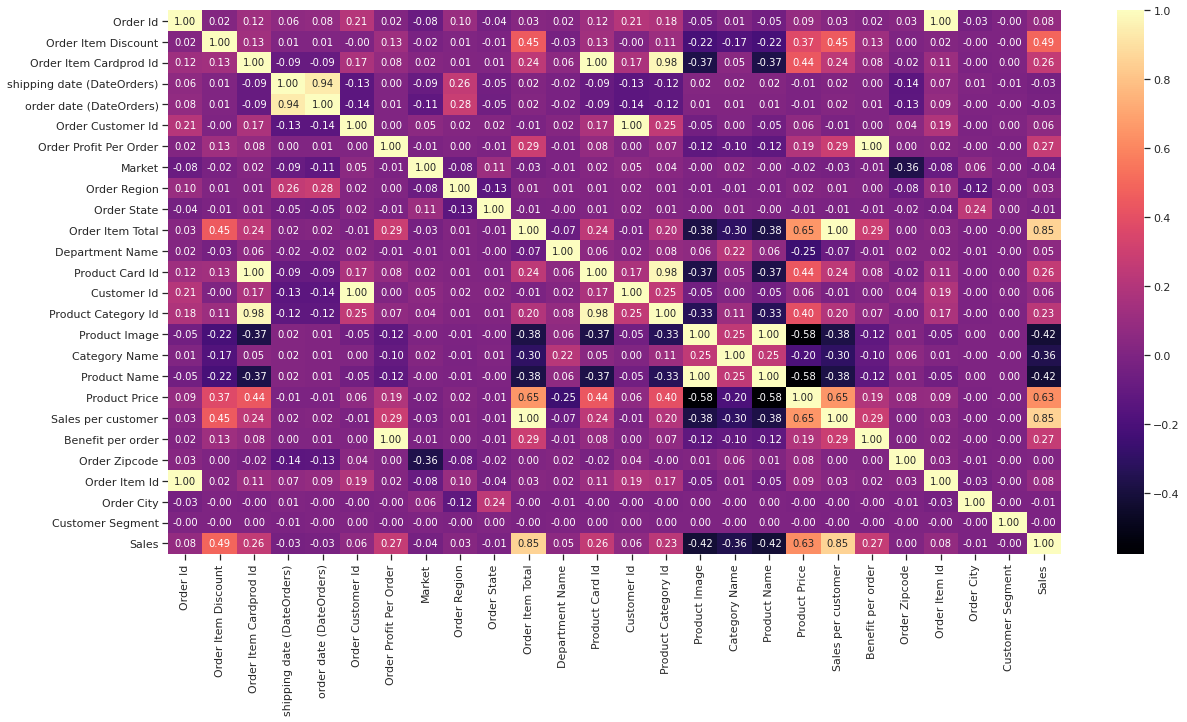

In [102]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [105]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler", StandardScaler()), ("randomforest_regression", RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn_regression", KNeighborsRegressor())])

In [106]:
pipelines = [lr_pipeline, ridge_pipeline, lasso_pipeline,
            random_forest_pipeline, xgboost_pipeline, knn_pipeline]

In [107]:
pipe_dict = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "RandomForest", 4: "XGBoost",
            5: "Decision Tree", 6: "KNN"}

In [108]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, final_features,target, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.7852647150644007
Ridge :  0.785264849136577
Lasso :  0.7805693158852282
RandomForest :  0.9995414205129233
XGBoost :  0.999651640861491
Decision Tree :  0.9333894519285579


In [109]:
grid_params = [
    
{"classifier": [XGBRegressor()],
     "classifier__n_estimators": [100,150,200,250,300],
     
}
    
]

In [110]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [111]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)


In [112]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning:

The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed: 47.5min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 47.6min finished


In [113]:
best_model.best_params_

{'classifier__n_estimators': 300,
 'classifier': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)}

In [114]:
pipeline_XGBRegressor = Pipeline([('scaler', StandardScaler()), ('XGBRegressor',  XGBRegressor(importance_type='gain', n_estimators=300, ))])

In [115]:
model = pipeline_XGBRegressor.fit(X_train, y_train)

In [116]:
XGB_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model.predict(X_train)})
XGB_train_predict.head()

actual   predicted
99963  149.940002  149.975128
63538  210.850006  210.474564
6661   179.970001  179.993896
93913  129.990005  129.989929
90626  129.990005  129.990906

In [117]:
XGB_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model.predict(X_test)})
XGB_test_predict.head()

actual   predicted
80120   199.990005  199.987198
19670   250.000000  249.987595
114887  249.899994  249.878433
120110  299.980011  299.969971
56658   119.970001  119.918625

In [118]:
predict = model.predict(X_test)

In [119]:
r2_score(y_test, predict, multioutput='uniform_average')

0.9974757060247059

In [120]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=predict, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))


fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')